# **Hotel Bookings and Cancellation**



In [1]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.1 MB/s eta 0:00:00


In [2]:
pip install folium

In [3]:
pip install scikit-learn

In [4]:
pip install xgboost

In [5]:
pip install sidetable

In [6]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [7]:
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sidetable as stb
import plotly.express as px
import folium

from datetime import datetime as dt, date
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from scipy import stats
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#import eli5


# Understanding of the Data

In [9]:
#file_path = r'C:\Users\neena\Documents\Python\MSIS\Data Programming\Project\hotel_bookings.csv'

data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
data.shape

(119390, 32)

In [12]:
missing_data = data.isna().sum()

for column, count in missing_data.items():
    if count>0:
        print(f"{column}: 'Null Values': {count}")

children: 'Null Values': 4
country: 'Null Values': 488
agent: 'Null Values': 16340
company: 'Null Values': 112593


In [13]:
no_undefined = (data == "Undefined").sum()
print(no_undefined[no_undefined > 0])

meal                    1169
market_segment             2
distribution_channel       5
dtype: int64


In [14]:
zero_occurrences = (data == 0).sum()
print(zero_occurrences[zero_occurrences > 0])

is_canceled                        75166
lead_time                           6345
stays_in_weekend_nights            51998
stays_in_week_nights                7645
adults                               403
children                          110796
babies                            118473
is_repeated_guest                 115580
previous_cancellations            112906
previous_bookings_not_canceled    115770
booking_changes                   101314
days_in_waiting_list              115692
adr                                 1959
required_car_parking_spaces       111974
total_of_special_requests          70318
dtype: int64


In [15]:
#If there's no information in the 'children' column, we'll put a 0 there instead.
data['children'] = data['children'].fillna(0)
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
#It figures out which country appears most often in the 'country' column by counting how many times each country is listed.
#Then,it tells you the name of the country that appears the most.
#by using the value_counts() method.
data['country'] = data['country'].fillna(data['country'].value_counts().index[0])
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# contains a DataFrame with two columns: 'index' (representing unique countries) and 'country' (representing the count of non-canceled guests from each country).
location = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
# renames the columns of the location DataFrame. 'index' is renamed to 'Country', and 'country' is renamed to 'No of guests'.
location.columns = ['Country', 'No of guests']
#initializes an empty basemap using the Folium library
basemap = folium.Map()
#  function from the Plotly Express library. It creates a choropleth map, a geographic map.
guests_map = px.choropleth(location, locations = location['Country'],
                           color = location['No of guests'], hover_name = location['Country'])
guests_map.show()

In [18]:
data.shape

(119390, 32)

In [19]:
#droping columns "agent" and "company" from the DataFrame
data = data.drop(columns = ['agent', 'company'])
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
data.shape

(119390, 30)

# Draw graph

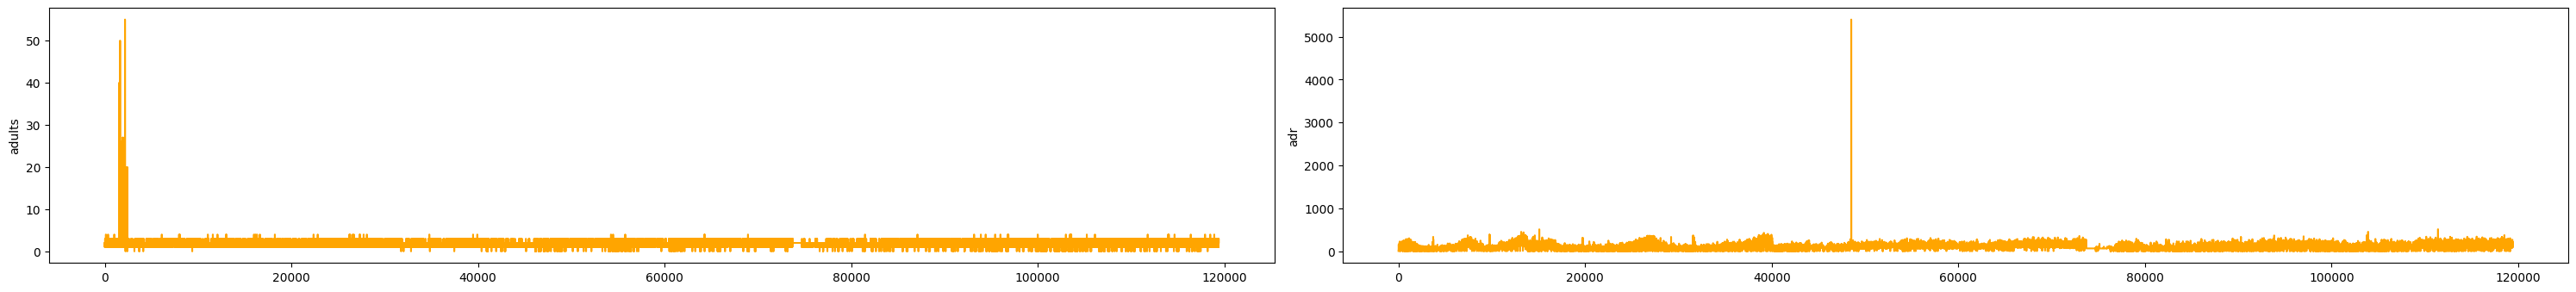

In [21]:
plt.figure(figsize = (30, 20))
x = 1

for column in data.describe().columns:
    if (column=="adr" or column=="adults"):
        plt.subplot(6,2,x)
        sns.lineplot(data[column],color='orange')
        x+=1

plt.tight_layout()


In [22]:
# Since it's unrealistic for a hotel room to be booked with 0 adults,
# we will remove any rows in which the 'adults' column has a value of 0."

data.drop(labels = data[data['adults'] == 0].index, axis = 0, inplace = True)
data[data['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [23]:
#Some values in the 'adr' column are below 0, which is impossible because hotels should not owe money to guests."
data = data.drop(data[data.adr < 0].index)
data[data['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [24]:
#drop the rows where the "adr" column has a value greater which is unrealistic compare to other values 5000
data = data.drop(data[data.adr > 2000].index)
data[data['adr']> 2000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [25]:
#we have stays in weekend nights and week nights, so we are calculating total_stays
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [26]:
 #it is available that to book hotel on the same day as we check out (not an over night stay in portugal) based on the hilton hotel so we will not be dropping the rows that has 0 total stays ( not an overnight) stay
data[data['total_stays'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [27]:
#We have made some changes to the data: we combined 'children' and 'babies' into one category called 'kids' because they are similar,
#We also added up 'stays in weekend nights' and 'stays in week nights' to create a new column called 'total stays.'
#Now, we are going to delete both the 'children' and 'babies' columns and the 'stays in weekend nights' and 'stays in week nights' columns."
data['kids'] = data['children'] + data['babies']

data = data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children'])
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0.0


In [28]:
data.describe()

#Most bookings are for 2 adults without children or babies.
#Repeated guests make up a small percentage of the bookings.
#Previous cancellations and changes to bookings are relatively rare.
#The average daily rate (ADR) is approximately 101.96.
#Features like 'previous_cancellations', 'adr', 'adults' have relatively high maximum values, indicating the presence of outliers.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,1.862689,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,3.425961,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.570064,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,2.541649,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,69.000000,10.000000


In [29]:
#restoring the new cleaned data
file_path = r'C:\Users\neena\Documents\Python\MSIS\Data Programming\Project\hotel_bookings_cleaned.csv'

data.to_csv(file_path ,index= False)

In [30]:
data.corr()
cancel_corr = data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

#the number of days between the booking date and arrival date


lead_time                         0.293000
total_of_special_requests         0.235262
required_car_parking_spaces       0.195864
booking_changes                   0.144865
previous_cancellations            0.110223
is_repeated_guest                 0.083771
adults                            0.058891
previous_bookings_not_canceled    0.057405
days_in_waiting_list              0.054358
adr                               0.047556
total_stays                       0.018410
arrival_date_year                 0.016461
arrival_date_week_number          0.008326
arrival_date_day_of_month         0.005897
kids                              0.003193
Name: is_canceled, dtype: float64

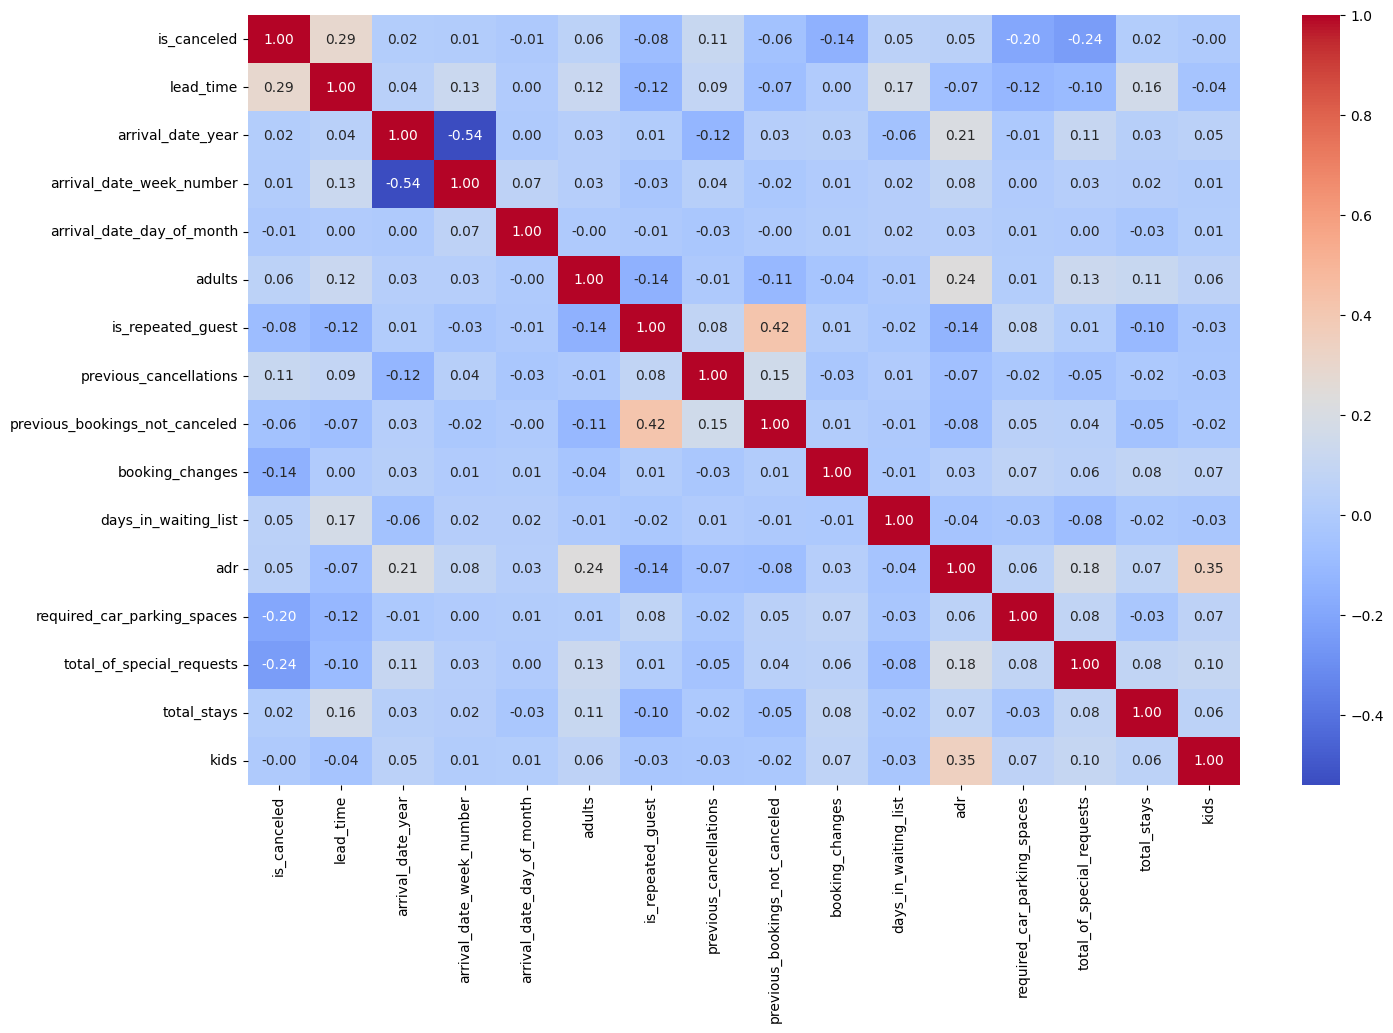

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Exploratory Data Analysis (EDA) process

#### How many bookings were cancelled?

In [32]:
#Calculate the frequency of 'is_canceled' values in the dataset, without increaing counts.
data.stb.freq(['is_canceled'], cum_cols = False)

,is_canceled,count,percent
0,0,74871,62.924738
1,1,44114,37.075262


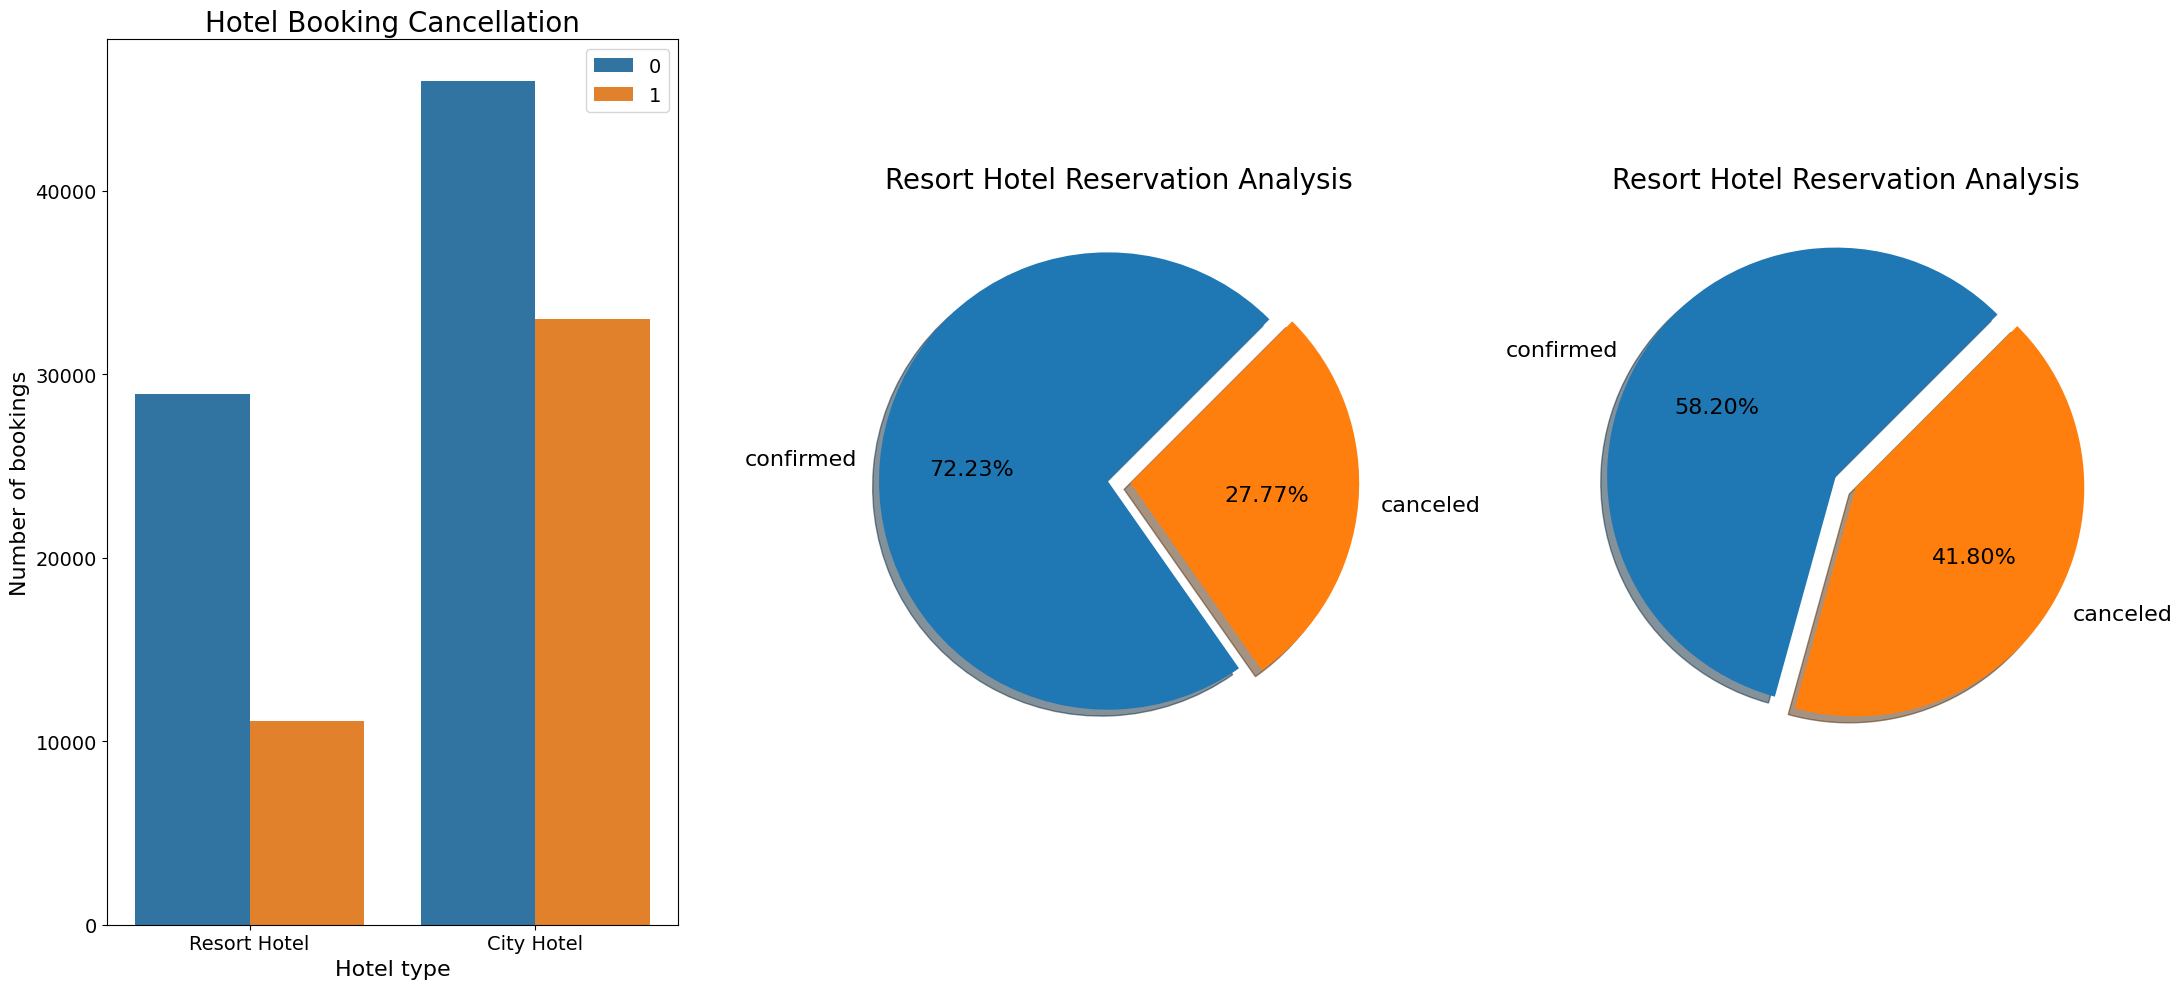

In [33]:
hotel_resort = data[data['hotel'] == 'Resort Hotel']
hotel_city = data[data['hotel'] == 'City Hotel']

fig = plt.figure(figsize=(22, 10))
ax1 = fig.add_subplot(1,3,1)  # 1 row, 3 columns, 1st subplot
ax2 = fig.add_subplot(1,3,2)  # 1 row, 3 columns, 2nd subplot
ax3 = fig.add_subplot(1,3,3)  # 1 row, 3 columns, 3rd subplot

# Creating a countplot for hotel bookings and cancellations
sns.countplot(x="hotel", data=data, hue="is_canceled", ax=ax1)

# Setting the title and label fontsizes
ax1.set_title('Hotel Booking Cancellation', fontsize=20)
ax1.set_xlabel('Hotel type', fontsize=16)
ax1.set_ylabel('Number of bookings', fontsize=16)

# Setting the tick label fontsize
ax1.tick_params(axis='both', labelsize=14)

# Adding legend with fontsize
ax1.legend(loc=0, fontsize=14)


# Pie chart for Resort Hotel Reservation Analysis
ax2.pie(hotel_resort['is_canceled'].value_counts(normalize=True), labels=['confirmed', 'canceled'],
        explode=[0.05, 0.05], autopct='%0.2f%%', startangle=45, textprops={'fontsize': 16}, shadow=True)
ax2.set_title('Resort Hotel Reservation Analysis', fontsize=20)

# Pie chart for City Hotel Reservation Analysis
ax3.pie(hotel_city['is_canceled'].value_counts(normalize=True), labels=['confirmed', 'canceled'],
        explode=[0.05, 0.05], autopct='%0.2f%%', startangle=45, textprops={'fontsize': 16}, shadow=True)
ax3.set_title('Resort Hotel Reservation Analysis', fontsize=20)

plt.tight_layout()
plt.show()


#### Which month has highest number of cancellations?

In [34]:
# data.describe()

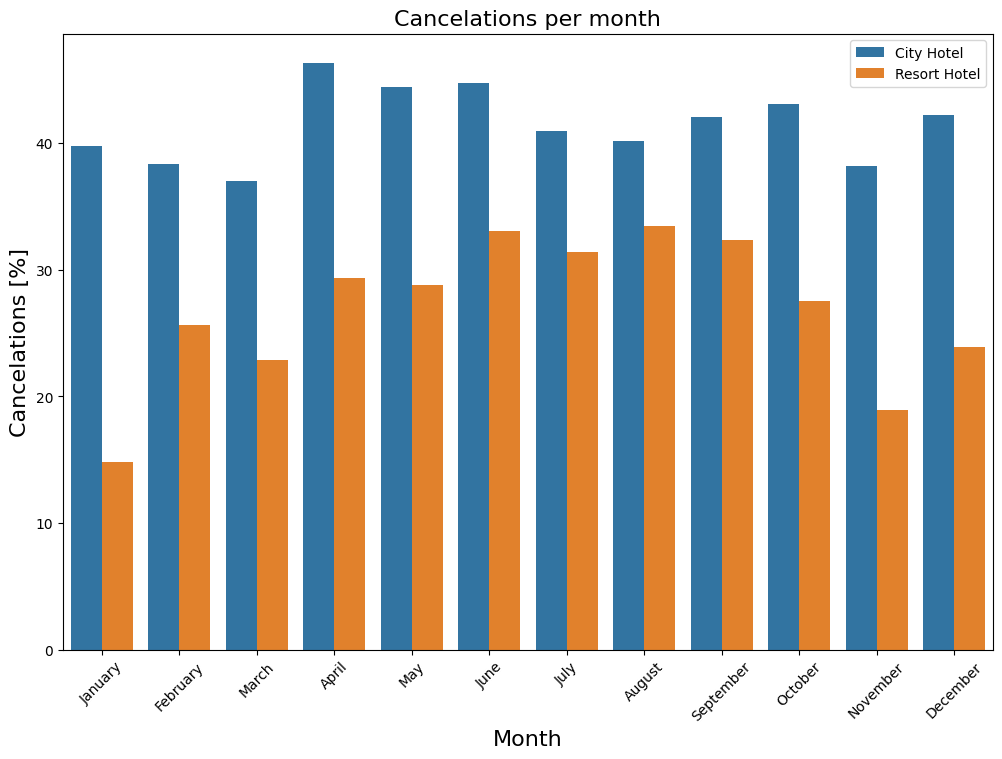

In [35]:
# Create a DataFrame with the relevant data:
#This line calculates the total number of monthly bookings for the 'Resort Hotel'.
resort_monthly_booking_rate = data[data["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["hotel"].count()
#This line calculates the total number of monthly cancellations for the 'Resort Hotel'.
resort_monthly_cancel_rate = data[data["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["is_canceled"].sum()

city_monthly_booking_rate = data[data["hotel"] == "City Hotel"].groupby("arrival_date_month")["hotel"].count()
city_cancel_booking_rate = data[data["hotel"] == "City Hotel"].groupby("arrival_date_month")["is_canceled"].sum()

resort_cancel_data = pd.DataFrame({
    "Hotel": "Resort Hotel",  # the hotel type
    "Month": list(resort_monthly_booking_rate.index),  # Months extracted from the index of resort_monthly_booking_rate
    "Bookings": list(resort_monthly_booking_rate.values),  # Monthly bookings for the resort hotel
    "Cancelations": list(resort_monthly_cancel_rate.values)  # Monthly cancellations for the resort hotel
})
city_cancel_data = pd.DataFrame({
    "Hotel": "City Hotel",  # the hotel type
    "Month": list(city_monthly_booking_rate.index),  # Months extracted from the index of city_monthly_booking_rate
    "Bookings": list(city_monthly_booking_rate.values),  # Monthly bookings for the city hotel
    "Cancelations": list(city_cancel_booking_rate.values)  # Monthly cancellations for the city hotel
})

full_cancel_data = pd.concat([resort_cancel_data, city_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# Order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# Show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="Month", y="cancel_percent", hue="Hotel", hue_order=["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()


#### Which are the most busy months?

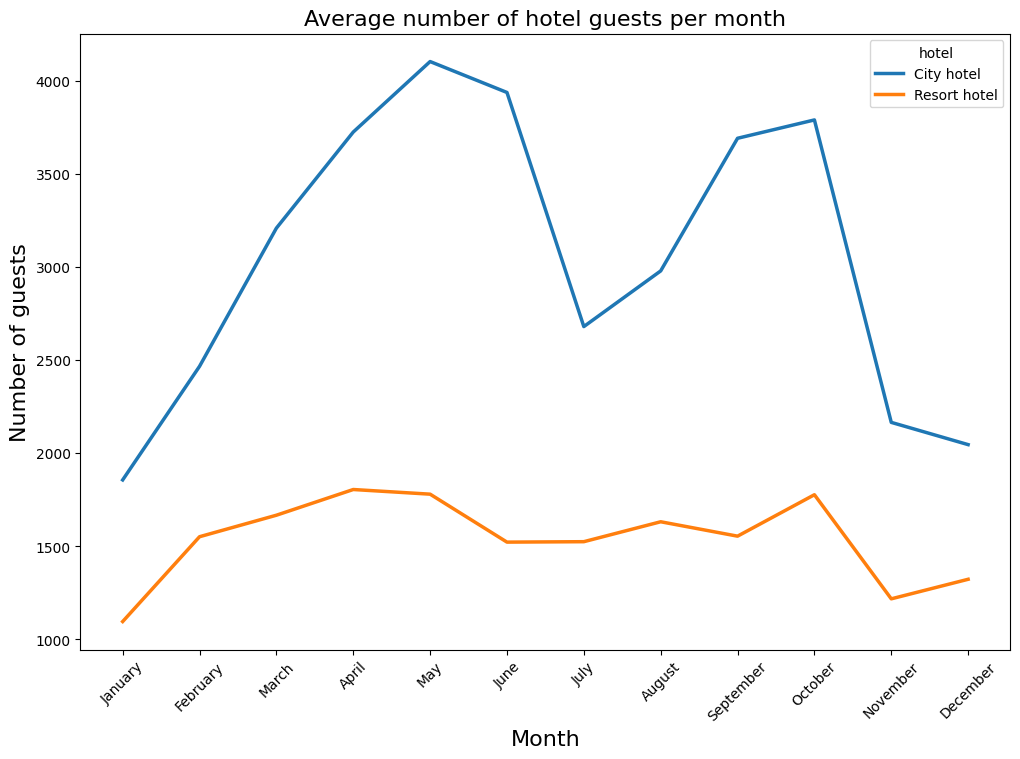

In [36]:
# Create a DataFrame with the relevant data:
resort_guests_monthly = data[data["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = data[data["hotel"] == "City Hotel"].groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel",
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel",
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index=True)

# Order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other months from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

# Show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="guests", hue="hotel", data=full_guest_data,
             hue_order=["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()


#### How is the deposit type affecting the cancellation?

              Not Canceled  Canceled
deposit_type                        
No Deposit           74652     29585
Non Refund              93     14493
Refundable             126        36


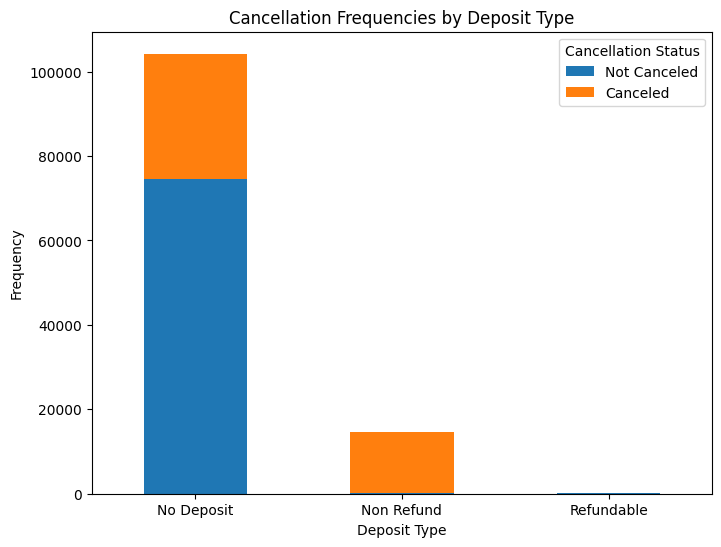

In [37]:
# Create a pivot table to calculate the frequencies of cancellations for each deposit type
cancellation_freq_table = pd.pivot_table(data, index='deposit_type', columns='is_canceled', values='hotel', aggfunc='count', fill_value=0)

# Rename the columns for clarity
cancellation_freq_table.columns = ['Not Canceled', 'Canceled']

# Display the frequency table
print(cancellation_freq_table)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
cancellation_freq_table.plot(kind='bar', stacked=True, ax=ax)
plt.title('Cancellation Frequencies by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status', loc='upper right')
plt.show()

#### Bookings by Market Segment

In [38]:
# drop the rows where the "market_segment" column has a value undefined
data = data.drop(data[data.market_segment == "Undefined"].index)
pd.crosstab(data['market_segment'], data['is_canceled'], normalize = 'index')

is_canceled,0,1
market_segment,,
Aviation,0.778723,0.221277
Complementary,0.878453,0.121547
Corporate,0.812382,0.187618
Direct,0.846491,0.153509
Groups,0.388883,0.611117
Offline TA/TO,0.656713,0.343287
Online TA,0.632522,0.367478


In [39]:
import plotly.graph_objects as go
market_cancellation = pd.crosstab(data['market_segment'], data['is_canceled'], normalize = 'index')

print(market_cancellation)

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=market_cancellation.index, y=market_cancellation[0],marker_color = 'blue'),
    go.Bar(name='Cancelled Booking', x=market_cancellation.index, y=market_cancellation[1],marker_color = 'orange')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Market Segment',
                 yaxis=dict(
                 title='Percentage of booking (%) / Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,),
                 xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


is_canceled            0         1
market_segment                    
Aviation        0.778723  0.221277
Complementary   0.878453  0.121547
Corporate       0.812382  0.187618
Direct          0.846491  0.153509
Groups          0.388883  0.611117
Offline TA/TO   0.656713  0.343287
Online TA       0.632522  0.367478


In [40]:
df=data

In [41]:
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

In [42]:
X = df[['hotel_encoded','lead_time', 'market_segment', 'deposit_type', 'required_car_parking_spaces', 'total_of_special_requests', 'previous_cancellations', 'is_repeated_guest', 'booking_changes', 'customer_type', 'total_stays', ]]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [43]:
categorial_columns = ['market_segment','deposit_type','customer_type']
numerical_columns = ['hotel_encoded','lead_time', 'required_car_parking_spaces', 'total_of_special_requests']

In [44]:
#to convert categorical variables into binary
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

#to scale numerical features, making them robust to outliers
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

#applies the appropriate preprocessing pipelines to the specified columns
prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,categorial_columns),
    ('numerical', numerical_pipeline,numerical_columns)
])

# random state=none, multi class=auto
pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

#n_neighbors=5
pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])

#n_estimators=100,max_depth=none,random state=none
pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

#random state=none, max_depth=none
pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])



#### LOGISTIC REGRESSION

In [45]:
pipe_logreg.fit(X_train, y_train)
y_base_logistic_predictions =  pipe_logreg.predict(X_test)
y_base_logistic_predictions_train = pipe_logreg.predict(X_train)
base_logistic_recall = recall_score(y_test, y_base_logistic_predictions)
base_logistic_accuracy = accuracy_score(y_test, y_base_logistic_predictions)
base_logistic_precision = precision_score(y_test, y_base_logistic_predictions)
base_logistic_f1_score = f1_score(y_test, y_base_logistic_predictions)
base_logistic_accuracy_train = accuracy_score(y_train, y_base_logistic_predictions_train)

print(f"Training Accuracy : {base_logistic_accuracy_train}")
print(f"Testing Accuracy : {base_logistic_accuracy}")

Training Accuracy : 0.7871220557645032
Testing Accuracy : 0.788376686136908


In [46]:
print(classification_report(y_test, y_base_logistic_predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     14974
           1       0.83      0.54      0.65      8823

    accuracy                           0.79     23797
   macro avg       0.80      0.74      0.75     23797
weighted avg       0.80      0.79      0.78     23797



In [47]:
base_logistic_confusion_mat = confusion_matrix(y_test, y_base_logistic_predictions, labels = [1,0])
base_logreg_df = pd.DataFrame(data = base_logistic_confusion_mat, index = ['actual 1', 'actual 0'], columns = ['Predicted 1', 'Predicted 0'])
base_logreg_df

,Predicted 1,Predicted 0
actual 1,4738,4085
actual 0,951,14023


#### KNN

In [48]:
pipe_KNN.fit(X_train, y_train)
y_base_KNN_predictions =  pipe_KNN.predict(X_test)
y_base_KNN_predictions_train = pipe_KNN.predict(X_train)

In [49]:
base_KNN_recall = recall_score(y_test, y_base_KNN_predictions)
base_KNN_accuracy = accuracy_score(y_test, y_base_KNN_predictions)
base_KNN_precision = precision_score(y_test, y_base_KNN_predictions)
base_KNN_f1_score = f1_score(y_test, y_base_KNN_predictions)
base_KNN_accuracy_train = accuracy_score(y_train, y_base_KNN_predictions_train)

print(f"Training Accuracy : {base_KNN_accuracy_train}")
print(f"Testing Accuracy : {base_KNN_accuracy}")

Training Accuracy : 0.8124829281617044
Testing Accuracy : 0.7906458797327395


In [50]:
print(classification_report(y_test, y_base_KNN_predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     14974
           1       0.74      0.66      0.70      8823

    accuracy                           0.79     23797
   macro avg       0.78      0.76      0.77     23797
weighted avg       0.79      0.79      0.79     23797



In [51]:
base_KNN_confusion_mat = confusion_matrix(y_test, y_base_KNN_predictions, labels = [1,0])
base_KNN_df = pd.DataFrame(data = base_KNN_confusion_mat, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
base_KNN_df

,Prediction 1,Prediction 0
actual 1,5852,2971
actual 0,2011,12963


#### DESCISION TREE

In [52]:

pipe_DT.fit(X_train, y_train)
y_base_DT_predictions =  pipe_DT.predict(X_test)
y_base_DT_predictions_train = pipe_DT.predict(X_train)

In [53]:
base_DT_recall = recall_score(y_test, y_base_DT_predictions)
base_DT_accuracy = accuracy_score(y_test, y_base_DT_predictions)
base_DT_precision = precision_score(y_test, y_base_DT_predictions)
base_DT_f1_score = f1_score(y_test, y_base_DT_predictions)
base_DT_accuracy_train = accuracy_score(y_train, y_base_DT_predictions_train)

print(f"Training Accuracy : {base_DT_accuracy_train}")
print(f"Testing Accuracy : {base_DT_accuracy}")


Training Accuracy : 0.8395562372617822
Testing Accuracy : 0.80808505273774


In [54]:
print(classification_report(y_test, y_base_DT_predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     14974
           1       0.78      0.67      0.72      8823

    accuracy                           0.81     23797
   macro avg       0.80      0.78      0.79     23797
weighted avg       0.81      0.81      0.80     23797



In [55]:
base_DT_confusion_mat = confusion_matrix(y_test, y_base_DT_predictions, labels = [1,0])
base_DT_df = pd.DataFrame(data = base_DT_confusion_mat, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
base_DT_df

,Prediction 1,Prediction 0
actual 1,5932,2891
actual 0,1676,13298


#### RANDOM FOREST

In [56]:
pipe_RF.fit(X_train, y_train)
y_base_RF_predictions =  pipe_RF.predict(X_test)
y_base_RF_predictions_train = pipe_RF.predict(X_train)
base_RF_recall = recall_score(y_test, y_base_RF_predictions)
base_RF_accuracyl = accuracy_score(y_test, y_base_RF_predictions)
base_RF_precision = precision_score(y_test, y_base_RF_predictions)
base_RF_f1_score= f1_score(y_test, y_base_RF_predictions)
base_RF_accuracy_train = accuracy_score(y_train, y_base_RF_predictions_train)

print(f"Training Accuracy : {base_RF_accuracy_train}")
print(f"Testing Accuracy : {base_RF_accuracyl}")

Training Accuracy : 0.8395562372617822
Testing Accuracy : 0.807748875908728


In [57]:
print(classification_report(y_test, y_base_RF_predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     14974
           1       0.77      0.68      0.72      8823

    accuracy                           0.81     23797
   macro avg       0.80      0.78      0.79     23797
weighted avg       0.81      0.81      0.80     23797



In [58]:
base_RF_confusion_train = confusion_matrix(y_test, y_base_RF_predictions, labels = [1,0])
base_RF_df= pd.DataFrame(data = base_RF_confusion_train, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
base_RF_df

,Prediction 1,Prediction 0
actual 1,6021,2802
actual 0,1773,13201


#### TEST ON DUMMY DATA

In [59]:
data_demo = {
    "name" : "John",
    "Sex" : "male",
    "Age" : 28,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 200,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'required_car_parking_spaces':1,
    'total_of_special_requests':1,
    'is_previously_cancelled':1,
    'is_repeated_guest':0,
    'is_booking_changes':0,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "john@hotel.com"
}

john = pd.DataFrame(data = data_demo, index = [1])
pipe_RF.predict_proba(john)


array([[0.985, 0.015]])

In [60]:
pipe_DT.predict_proba(john)

array([[1., 0.]])

In [61]:
pipe_KNN.predict_proba(john)

array([[1., 0.]])

In [62]:
pipe_logreg.predict_proba(john)

array([[9.99228124e-01, 7.71876343e-04]])

Text(0.5, 1.0, 'Random Forest')

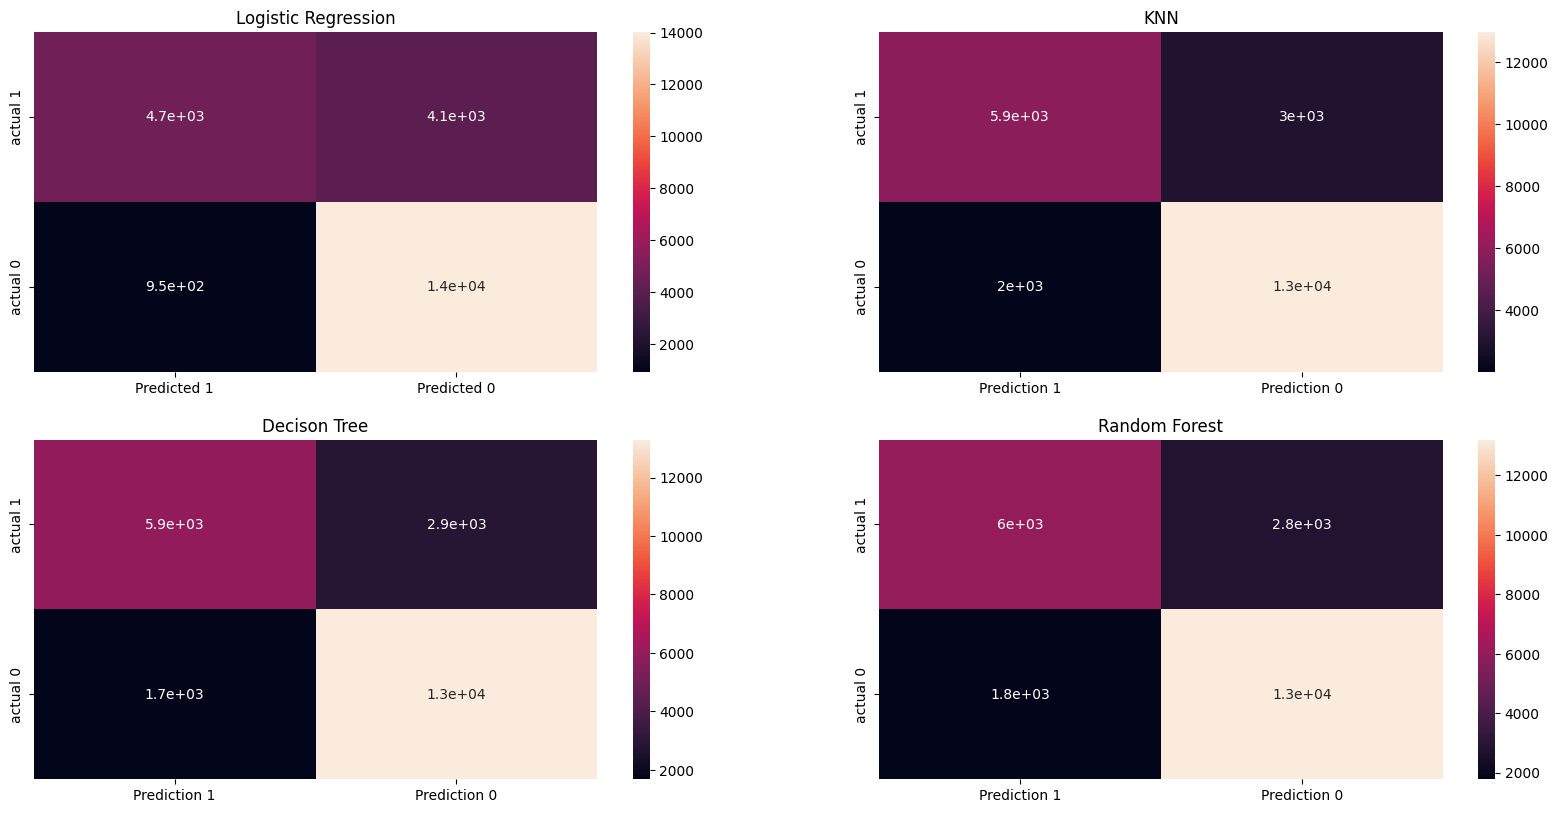

In [63]:
# confusion Matrix Figure For All The Chart

plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(base_logreg_df, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(base_KNN_df, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(base_DT_df, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(base_RF_df, annot = True)
plt.title('Random Forest')